# Step [1]: Prepare libraries and data

In [1]:
!pip install arabic-reshaper

In [2]:
!pip install python-bidi

In [3]:
!pip install PyArabic

     |████████████████████████████████| 126 kB 6.7 MB/s 


In [5]:
!pip install Tashaphyne

In [4]:
!pip install qalsadi

     |████████████████████████████████| 257 kB 7.9 MB/s 
     |████████████████████████████████| 138 kB 53.9 MB/s 
     |████████████████████████████████| 353 kB 51.4 MB/s 
     |████████████████████████████████| 50 kB 7.9 MB/s 
     |████████████████████████████████| 332 kB 71.4 MB/s 
     |████████████████████████████████| 9.2 MB 55.2 MB/s 
     |████████████████████████████████| 244 kB 78.0 MB/s 
  Created wheel for pickledb: filename=pickleDB-0.9.2-py3-none-any.whl size=4268 sha256=77c25bbe035a9302718568454b4032c5ebe9641d78052ec8530cfe94cc7db46b
  Stored in directory: /root/.cache/pip/wheels/08/34/42/9a7f94099208ce3d32638d98586a5a50f821db2fc75a3bdaae
Successfully built pickledb


## [1.1] Include important libraries

In [6]:
import nltk
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt           
import matplotlib
from wordcloud import WordCloud
from collections import Counter
from bidi.algorithm import get_display   
from arabic_reshaper import reshape
from nltk.tokenize import TweetTokenizer
import pyarabic.araby as araby
import pyarabic
from nltk.tokenize import word_tokenize
from tashaphyne.stemming import ArabicLightStemmer
import qalsadi.lemmatizer
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
nltk.download('stopwords')
stop_words = set(stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## [1.2] Download data

In [8]:
!wget 'https://drive.google.com/uc?export=download&id=1KepfzAhJ7dloG8XaWQf0ovQipDHYS8aI' -O 'final_data.zip'

--2021-12-04 22:23:39--  https://drive.google.com/uc?export=download&id=1KepfzAhJ7dloG8XaWQf0ovQipDHYS8aI
Resolving drive.google.com (drive.google.com)... 142.250.68.110, 2607:f8b0:4007:813::200e
Connecting to drive.google.com (drive.google.com)|142.250.68.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6f4bnh8do24q4nmp6err6945a5746kgu/1638656550000/04260309330816471542/*/1KepfzAhJ7dloG8XaWQf0ovQipDHYS8aI?e=download [following]
--2021-12-04 22:23:40--  https://doc-0o-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6f4bnh8do24q4nmp6err6945a5746kgu/1638656550000/04260309330816471542/*/1KepfzAhJ7dloG8XaWQf0ovQipDHYS8aI?e=download
Resolving doc-0o-00-docs.googleusercontent.com (doc-0o-00-docs.googleusercontent.com)... 142.250.176.1, 2607:f8b0:4007:809::2001
Connecting to doc-0o-00-docs.googleusercontent.com (doc-0o-00-docs.g

In [9]:
!unzip final_data.zip

Archive:  final_data.zip
  inflating: test.csv                
  inflating: train.csv               
  inflating: valid.csv               


## [1.3] read data from csv file

In [10]:
test = pd.read_csv('test.csv')

In [11]:
train = pd.read_csv('train.csv')

In [12]:
valid = pd.read_csv('valid.csv')

In [13]:
train.head()

,tweet,label
0,#تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمره...,2
1,'#خذ_الخطوة_خذ_اللقاح \nالحمدالله من قبل ومن ب...,1
2,لو اللي مثلك وشرواك طعمو كان قد حذفنا الكمامات...,1
3,#الصحة:•نحو 14.5 مليون شخص تم إعطاؤهم جرعة لقا...,1
4,• في منظور القوة البشرية ( الأزمة ستطول لأشهر ...,3


# Step [2]: Text Analysis

# Step [2.1]: count tweet per label 

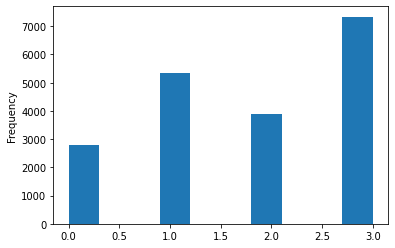

In [14]:
train['label'].value_counts()
train['label'].plot(kind='hist')

## [2.2] find the word and n_grams most common and less 

In [15]:

bigramfdist = nltk.FreqDist()

for i, [tweet, label] in enumerate(train.values):
  tokens = str(tweet).strip().split(' ')
  bigrams2 = nltk.ngrams(tokens, 2)
  bigramfdist.update(bigrams2)

print(bigramfdist.most_common()[:10])
#الكلمات الاقل تكرارا
print(bigramfdist.most_common()[-10:])

[(('لقاح', 'كورونا'), 2898), (('', ''), 2523), (('من', 'لقاح'), 1230), (('فيروس', 'كورونا'), 926), (('على', 'لقاح'), 467), (('لقاح', '#كورونا'), 464), (('لقاح', 'فيروس'), 462), (('وزارة', 'الصحة'), 428), (('كورونا', 'في'), 358), (('ضد', 'فيروس'), 334)]
[(('', 'النظرة'), 1), (('النظرة', 'الشرعية'), 1), (('الشرعية', ''), 1), (('😂😂', 'عندهم'), 1), (('', '..........'), 1), (('..........', 'https://t.co/KvdfIk0t1I'), 1), (('@bint__althani', 'وزير'), 1), (('البريطاني', 'فيروس'), 1), (('جديد', 'ينتشر'), 1), (('غرار', 'فيروس'), 1)]


In [16]:
bigramfdist = nltk.FreqDist()

for i, [tweet, label] in enumerate(train.values):
  #tokens = str(tweet).strip().split(' ')
  tokenizer = TweetTokenizer()
  tokens =tokenizer.tokenize(str(tweet))

  bigrams = nltk.ngrams(tokens, 1)
  bigramfdist.update(bigrams)

print(bigramfdist.most_common()[:10])
#الكلمات الاقل تكرارا
print(bigramfdist.most_common()[-10:])

[(('من',), 10731), (('لقاح',), 9711), (('كورونا',), 9084), (('في',), 7616), (('.',), 5981), (('،',), 5701), (('على',), 4975), (('اللقاح',), 4308), (('"',), 4053), (('..',), 3531)]
[(('https://t.co/uvRlfbQbdX',), 1), (('#زواج_وليد_الشمري',), 1), (('#ناقصك_ايه_وتبقي_مبسوط',), 1), (('#بالزمن_تعلمت',), 1), (('#البحرين_الكويت',), 1), (('#جوز_الست_ياسمين_المحروقه',), 1), (('#حماقي',), 1), (('#عمان_السعودية_مستقبل_مشرق',), 1), (('النظرة',), 1), (('https://t.co/KvdfIk0t1I',), 1)]


## [2.3] find the word and n_grams most common and less for each label

In [17]:
# for label 0
class1_text1 = " ".join(train[train['label'] == 0]['tweet'].tolist())
lablefre1 = nltk.FreqDist()
lablefre2 = nltk.FreqDist()
tokenizer = TweetTokenizer()
tokens =tokenizer.tokenize(str(class1_text1))

bigramlabel1 = nltk.ngrams(tokens, 1)
lablefre1.update(bigramlabel1)
print(lablefre1.most_common()[:10])
print(lablefre1.most_common()[-10:])

bigramlabel2 = nltk.ngrams(tokens, 2)
lablefre2.update(bigramlabel2)
print(lablefre2.most_common()[:10])
print(lablefre2.most_common()[-10:])
#Counter1 = Counter(tokens)

[(('من',), 1784), (('لقاح',), 1365), (('كورونا',), 1153), (('اللقاح',), 1122), (('في',), 1003), (('.',), 841), (('،',), 839), (('التطعيم',), 821), (('على',), 772), (('و',), 742)]
[(('امثالي',), 1), (('افسدوها',), 1), (('بسمومهم',), 1), (('انصرنا',), 1), (('القوم',), 1), (('الطغاه',), 1), (('الكفره',), 1), (('أنام',), 1), (('وطول',), 1), (('بالتخت',), 1)]
[(('لقاح', 'كورونا'), 466), (('!', '!'), 214), (('من', 'لقاح'), 102), (('؟', '؟'), 97), (('فيروس', 'كورونا'), 89), (('ً', 'ا'), 79), (('؟', '!'), 74), (('😂', '😂'), 67), (('،', '،'), 66), (('?', '?'), 66)]
[(('بحب', 'أنام'), 1), (('أنام', 'وطول'), 1), (('وطول', 'يومي'), 1), (('يومي', 'بالتخت'), 1), (('بالتخت', '🙂'), 1), (('🙂', '🤦'), 1), (('️', '💔'), 1), (('..', 'حسبي'), 1), (('عليهم', 'ونعم'), 1), (('الوكيل', '...'), 1)]


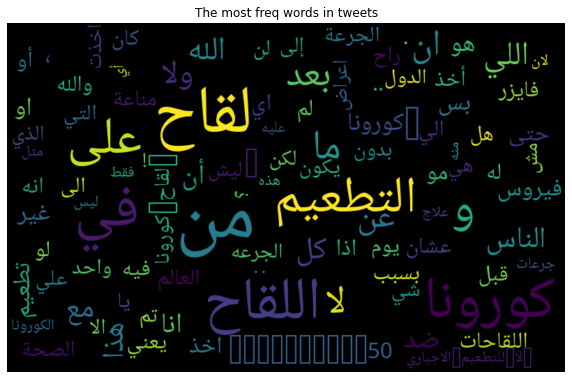

In [21]:
# WordCloud for label 0

rtl = lambda w: get_display(reshape(f'{w}')) 

#all_words = ' '.join([text for text in merged['tidy_tweet']])
COUNTS = Counter(class1_text1.split())
counts = {rtl(k):v for k, v in COUNTS.most_common(100)}

font_file = 'NotoNaskhArabic-Regular.ttf' # download from: https://www.google.com/get/noto
wordcloud = WordCloud(font_path=font_file, width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(counts)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('The most freq words in tweets')
plt.show()

In [22]:
# for label 1
class2_text1 = " ".join(train[train['label'] == 1]['tweet'].tolist())
label2freq1 = nltk.FreqDist()
label2freq2 = nltk.FreqDist()

tokenizer = TweetTokenizer()
tokens =tokenizer.tokenize(str(class2_text1))
bigramslabel21 = nltk.ngrams(tokens, 1)
label2freq1.update(bigramslabel21)
print(label2freq1.most_common()[:10])
print(label2freq1.most_common()[-10:])

bigramslabel22 = nltk.ngrams(tokens, 2)
label2freq2.update(bigramslabel22)
print(label2freq2.most_common()[:10])
print(label2freq2.most_common()[-10:])

[(('من',), 3309), (('لقاح',), 3242), (('كورونا',), 2569), (('في',), 2247), (('.',), 1899), (('،',), 1825), (('على',), 1614), (('اللقاح',), 1384), (('"',), 1186), (('التطعيم',), 1066)]
[(('لمقرب',), 1), (('رافعا',), 1), (('بعلامة',), 1), (('بوضع',), 1), (('إشارة',), 1), (('@UNICEFinArabic',), 1), (('وصديق',), 1), (('تحظى',), 1), (('بإعادة',), 1), (('#vaccinated',), 1)]
[(('لقاح', 'كورونا'), 1133), (('من', 'لقاح'), 569), (('فيروس', 'كورونا'), 400), (('\\', 'n'), 325), (('ً', 'ا'), 277), (('-', '19'), 256), (('كوفيد', '-'), 246), (('لقاح', 'فيروس'), 197), (('لقاح', '#كورونا'), 194), (('وزارة', 'الصحة'), 180)]
[(('وصديق', 'تلقى'), 1), (('19', 'أيضا'), 1), (('ً', 'وقد'), 1), (('وقد', 'تحظى'), 1), (('تحظى', 'بإعادة'), 1), (('بإعادة', 'المشاركة'), 1), (('المشاركة', '!'), 1), (('!', '✌'), 1), (('✌', 'لحملة'), 1), (('لحملة', '#vaccinated'), 1)]


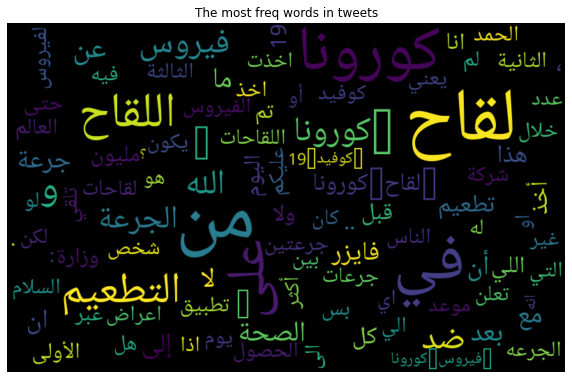

In [23]:
rtl = lambda w: get_display(reshape(f'{w}')) #تعديل الاندر سكور

#all_words = ' '.join([text for text in merged['tidy_tweet']])
COUNTS = Counter(class2_text1.split())
counts = {rtl(k):v for k, v in COUNTS.most_common(100)}

font_file = 'NotoNaskhArabic-Regular.ttf' # download from: https://www.google.com/get/noto
wordcloud = WordCloud(font_path=font_file, width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(counts)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('The most freq words in tweets')
plt.show()

In [24]:
# for label 3
class3_text1 = " ".join(train[train['label'] == 3]['tweet'].tolist())
label2freq1 = nltk.FreqDist()
label2freq2 = nltk.FreqDist()

tokenizer = TweetTokenizer()
tokens =tokenizer.tokenize(str(class2_text1))
bigramslabel21 = nltk.ngrams(tokens, 1)
label2freq1.update(bigramslabel21)
print(label2freq1.most_common()[:10])
print(label2freq1.most_common()[-10:])

bigramslabel22 = nltk.ngrams(tokens, 2)
label2freq2.update(bigramslabel22)
print(label2freq2.most_common()[:10])
print(label2freq2.most_common()[-10:])

[(('من',), 3309), (('لقاح',), 3242), (('كورونا',), 2569), (('في',), 2247), (('.',), 1899), (('،',), 1825), (('على',), 1614), (('اللقاح',), 1384), (('"',), 1186), (('التطعيم',), 1066)]
[(('لمقرب',), 1), (('رافعا',), 1), (('بعلامة',), 1), (('بوضع',), 1), (('إشارة',), 1), (('@UNICEFinArabic',), 1), (('وصديق',), 1), (('تحظى',), 1), (('بإعادة',), 1), (('#vaccinated',), 1)]
[(('لقاح', 'كورونا'), 1133), (('من', 'لقاح'), 569), (('فيروس', 'كورونا'), 400), (('\\', 'n'), 325), (('ً', 'ا'), 277), (('-', '19'), 256), (('كوفيد', '-'), 246), (('لقاح', 'فيروس'), 197), (('لقاح', '#كورونا'), 194), (('وزارة', 'الصحة'), 180)]
[(('وصديق', 'تلقى'), 1), (('19', 'أيضا'), 1), (('ً', 'وقد'), 1), (('وقد', 'تحظى'), 1), (('تحظى', 'بإعادة'), 1), (('بإعادة', 'المشاركة'), 1), (('المشاركة', '!'), 1), (('!', '✌'), 1), (('✌', 'لحملة'), 1), (('لحملة', '#vaccinated'), 1)]


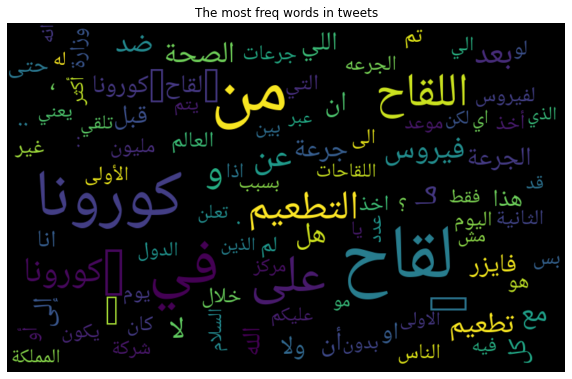

In [25]:
rtl = lambda w: get_display(reshape(f'{w}')) #تعديل الاندر سكور

#all_words = ' '.join([text for text in merged['tidy_tweet']])
COUNTS = Counter(class3_text1.split())
counts = {rtl(k):v for k, v in COUNTS.most_common(100)}

font_file = 'NotoNaskhArabic-Regular.ttf' # download from: https://www.google.com/get/noto
wordcloud = WordCloud(font_path=font_file, width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(counts)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('The most freq words in tweets')
plt.show()

## [2.4] histogram for lenght of tweet  

In [26]:
mytweet=[]
train['tweet'].fillna('', inplace=True)
for tweet in train['tweet']:
     mytweet.append(len(tweet))

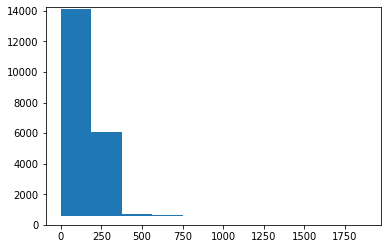

In [27]:
rslt=len(set(mytweet))
plt.hist(x=mytweet,y=rslt)
plt.show()

## [2.5] find trainding  hashtags for word 

In [28]:
def extract_hashtags(data,label):
  hashtags = []

  regex = "#(\w+)"
  if label >3:
      for i, [tweet, label] in enumerate(data.values):
         tokenizer = TweetTokenizer()
         tokens =tokenizer.tokenize(str(tweet))
         hashtags.append(re.findall(regex, str(tokens)))

  else:
    hashtag0 = " ".join(data[data['label'] == label]['tweet'].tolist())
    regex = "#(\w+)"
    #tokens = str(tweet).strip().split(' ')
    tokenizer = TweetTokenizer()
    tokens =tokenizer.tokenize(str(hashtag0))
    hashtags.append(re.findall(regex, str(tokens)))
  return(hashtags)

In [29]:
hash_data =extract_hashtags(train,5)
dff_0 = sum(hash_data,[])
data_0 = nltk.FreqDist(dff_0)
data_0 = pd.DataFrame({'Hashtag': list(data_0.keys()),
                  'Count': list(data_0.values())}).sort_values(by='Count', ascending=False)

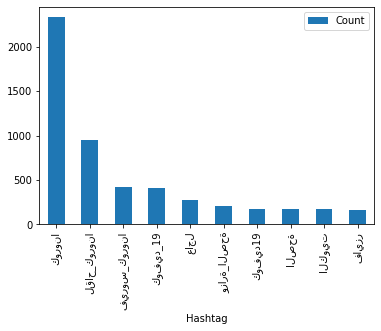

In [30]:
data_0[:10].plot(x ='Hashtag', y='Count', kind='bar')

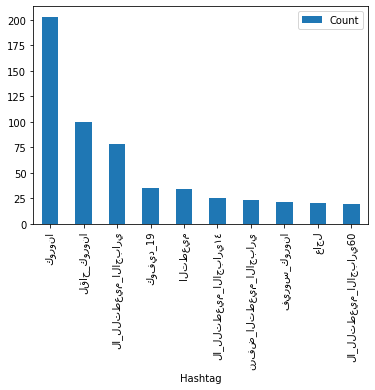

In [31]:
hash_data =extract_hashtags(train,0)
dff_0 = sum(hash_data,[])
data_class_0 = nltk.FreqDist(dff_0)
data_class_1 = pd.DataFrame({'Hashtag': list(data_class_0.keys()),
                  'Count': list(data_class_0.values())}).sort_values(by='Count', ascending=False)
data_class_1[:10].plot(x ='Hashtag', y='Count', kind='bar')


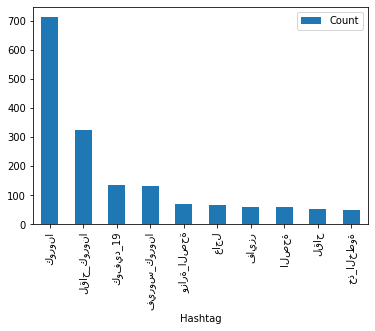

In [32]:
hash_data =extract_hashtags(train,1)
dff_0 = sum(hash_data,[])
data_class_0 = nltk.FreqDist(dff_0)
data_class_1 = pd.DataFrame({'Hashtag': list(data_class_0.keys()),
                  'Count': list(data_class_0.values())}).sort_values(by='Count', ascending=False)
data_class_1[:10].plot(x ='Hashtag', y='Count', kind='bar')

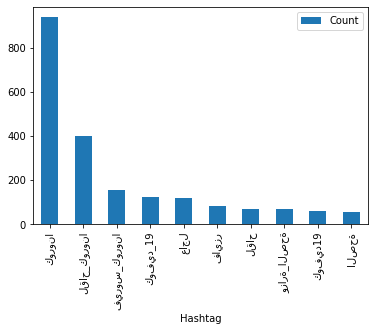

In [33]:
hash_data =extract_hashtags(train,3)
dff_0 = sum(hash_data,[])
data_class_0 = nltk.FreqDist(dff_0)
data_class_1 = pd.DataFrame({'Hashtag': list(data_class_0.keys()),
                  'Count': list(data_class_0.values())}).sort_values(by='Count', ascending=False)
data_class_1[:10].plot(x ='Hashtag', y='Count', kind='bar')


## [2.2] Data Cleaning

اكتب قبل كل تابع شرح ما يقوم به بالضبط وكيف يعمل، وضع ضمنه تعليقات لشرح الدخل والخرج كما في المثال الآتي

In [34]:
def remove_urls(tweet, work=1):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
        work: binary value take 1 by default working as on/off for the function, if work=0 the function will return
     the tweet without changing
    Output:
        cleaned_tweet: tweet after removing urls

    """
    return

لا تنس تجريب كل خطوة على نص يُطبع قبل وبعد تطبيق الخطوة

In [35]:
# There is no duplicate lines
train.duplicated().sum()

0

In [36]:
#حذف المنشنات والروابط والصور
#عدم حذف الهاشتاغ لانه يحيوي على معلومات مهمة نأخذها بعين الاعتبار

#Removing handles from tweets
def remove_handles(tweet,work):
  """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after removing handles

    """
  if work ==1:
     newtweet = re.sub("@\w*", " ", tweet)
  else:
     newtweet = tweet
  return newtweet

In [37]:
for x in train['tweet']:
  print("after",x)
  print("befor",remove_handles(x,1))
   
  break

after #تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمرها ٥٩ يوم اخذتها حديثه الولاده عمرها ٣ ايام تم التطعيم امس سبب العرض للتبني انا اعتني بالقطط حديثه الولاده  وعند اكتمال شهرين يحتاجوا مساحة  وانا ما عندي هادي لوجود اكثر من ٧ قطط حديثه الولاده للتواصل @saad28234346 التبني الرياض 
befor #تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمرها ٥٩ يوم اخذتها حديثه الولاده عمرها ٣ ايام تم التطعيم امس سبب العرض للتبني انا اعتني بالقطط حديثه الولاده  وعند اكتمال شهرين يحتاجوا مساحة  وانا ما عندي هادي لوجود اكثر من ٧ قطط حديثه الولاده للتواصل   التبني الرياض 


In [38]:
#remove link from tweets
def remove_link(tweet,work):
   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after removing link

    """
   if work ==1:
      newtweet = re.sub("(https|http|ftp)?://\S*.((\S*\S*)|(\S*))", " ", tweet)
   else:
     newtweet = tweet
   return newtweet


In [39]:
i =0
for x in train['tweet']:
  i= i+1
  print("after",x)
  print("befor",remove_link(x,1))
  if i ==9:
    break

after #تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمرها ٥٩ يوم اخذتها حديثه الولاده عمرها ٣ ايام تم التطعيم امس سبب العرض للتبني انا اعتني بالقطط حديثه الولاده  وعند اكتمال شهرين يحتاجوا مساحة  وانا ما عندي هادي لوجود اكثر من ٧ قطط حديثه الولاده للتواصل @saad28234346 التبني الرياض 
befor #تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمرها ٥٩ يوم اخذتها حديثه الولاده عمرها ٣ ايام تم التطعيم امس سبب العرض للتبني انا اعتني بالقطط حديثه الولاده  وعند اكتمال شهرين يحتاجوا مساحة  وانا ما عندي هادي لوجود اكثر من ٧ قطط حديثه الولاده للتواصل @saad28234346 التبني الرياض 
after '#خذ_الخطوة_خذ_اللقاح \nالحمدالله من قبل ومن بعد أخذت اليوم \nالجرعه الأولى من لقاح #فيروس_كورونا\nأسأل الله أن يجعل فيه العافيه وأن يزيل \nعن هذا الوباء عاجلا غير آجل. https://t.co/nG1D24s5Bx'
befor '#خذ_الخطوة_خذ_اللقاح \nالحمدالله من قبل ومن بعد أخذت اليوم \nالجرعه الأولى من لقاح #فيروس_كورونا\nأسأل الله أن يجعل فيه العافيه وأن يزيل \nعن هذا الوباء عاجلا غير آجل.  
after لو اللي مثلك وشرواك طعمو كان قد حذفنا الكمامات وارتاحت 

In [40]:
#remove image link from tweets
def remove_image(tweet,work):

   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after removing image

    """
   if work ==1:
      newtweet = re.sub("\w+(\.png|\.jpg|\.gif|\.jpeg)", " ", tweet)
   else:
     newtweet = tweet
   return newtweet

In [41]:
i =0
for x in train['tweet']:
  i= i+1
  print("after",x)
  print("befor",remove_image(x,1))
  if i ==9:
    break

after #تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمرها ٥٩ يوم اخذتها حديثه الولاده عمرها ٣ ايام تم التطعيم امس سبب العرض للتبني انا اعتني بالقطط حديثه الولاده  وعند اكتمال شهرين يحتاجوا مساحة  وانا ما عندي هادي لوجود اكثر من ٧ قطط حديثه الولاده للتواصل @saad28234346 التبني الرياض 
befor #تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمرها ٥٩ يوم اخذتها حديثه الولاده عمرها ٣ ايام تم التطعيم امس سبب العرض للتبني انا اعتني بالقطط حديثه الولاده  وعند اكتمال شهرين يحتاجوا مساحة  وانا ما عندي هادي لوجود اكثر من ٧ قطط حديثه الولاده للتواصل @saad28234346 التبني الرياض 
after '#خذ_الخطوة_خذ_اللقاح \nالحمدالله من قبل ومن بعد أخذت اليوم \nالجرعه الأولى من لقاح #فيروس_كورونا\nأسأل الله أن يجعل فيه العافيه وأن يزيل \nعن هذا الوباء عاجلا غير آجل. https://t.co/nG1D24s5Bx'
befor '#خذ_الخطوة_خذ_اللقاح \nالحمدالله من قبل ومن بعد أخذت اليوم \nالجرعه الأولى من لقاح #فيروس_كورونا\nأسأل الله أن يجعل فيه العافيه وأن يزيل \nعن هذا الوباء عاجلا غير آجل. https://t.co/nG1D24s5Bx'
after لو اللي مثلك وشرواك طعمو كان قد 

In [42]:
#remove duplicate from tweet
#نقوم بهذا العملية لتوحيد الكتابة قدر الامكان 
def remov_duplicates(tweet,work):
   
   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after removing duplicates

    """
   if work ==1:
      newtweet = re.sub(r'(\w)\1+', r'\1', tweet)
   else:
     newtweet = tweet
   return newtweet

In [43]:
dup ="امللل ننور"
remov_duplicates(dup,1)


'امل نور'

In [44]:
#حذف الايموجي ممكن يدل على مشاعر سلبية مثل السخرية من اللقاح بالرغم من ان تعبير الجملة ايجابي
#remove emojis
def remove_emojis(tweet,work):

   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after removing emojis

    """
   emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
   if work ==1:
     newtweet = re.sub(emoj, '', tweet)
   else:
     newtweet = tweet

   return newtweet

In [45]:
i =0
for x in train['tweet']:
  i= i+1
  print("after",x)
  print("befor",remove_emojis(x,1))
  if i ==9:
    break

after #تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمرها ٥٩ يوم اخذتها حديثه الولاده عمرها ٣ ايام تم التطعيم امس سبب العرض للتبني انا اعتني بالقطط حديثه الولاده  وعند اكتمال شهرين يحتاجوا مساحة  وانا ما عندي هادي لوجود اكثر من ٧ قطط حديثه الولاده للتواصل @saad28234346 التبني الرياض 
befor #تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمرها ٥٩ يوم اخذتها حديثه الولاده عمرها ٣ ايام تم التطعيم امس سبب العرض للتبني انا اعتني بالقطط حديثه الولاده  وعند اكتمال شهرين يحتاجوا مساحة  وانا ما عندي هادي لوجود اكثر من ٧ قطط حديثه الولاده للتواصل @saad28234346 التبني الرياض 
after '#خذ_الخطوة_خذ_اللقاح \nالحمدالله من قبل ومن بعد أخذت اليوم \nالجرعه الأولى من لقاح #فيروس_كورونا\nأسأل الله أن يجعل فيه العافيه وأن يزيل \nعن هذا الوباء عاجلا غير آجل. https://t.co/nG1D24s5Bx'
befor '#خذ_الخطوة_خذ_اللقاح \nالحمدالله من قبل ومن بعد أخذت اليوم \nالجرعه الأولى من لقاح #فيروس_كورونا\nأسأل الله أن يجعل فيه العافيه وأن يزيل \nعن هذا الوباء عاجلا غير آجل. https://t.co/nG1D24s5Bx'
after لو اللي مثلك وشرواك طعمو كان قد 

In [46]:
# remove punctuation

def remove_punctuation(tweet,work):
   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after removing punctuation

    """
   #punctuatuions = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
   if work ==1:
      newtweet = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~|\•|\)|\("""), ' ', tweet)
   else:
     newtweet = tweet
   return newtweet

In [47]:
i =0
for x in train['tweet']:
  i= i+1
  print("after",x)
  print("befor",remove_punctuation(x,1))
  if i ==4:
    break

after #تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمرها ٥٩ يوم اخذتها حديثه الولاده عمرها ٣ ايام تم التطعيم امس سبب العرض للتبني انا اعتني بالقطط حديثه الولاده  وعند اكتمال شهرين يحتاجوا مساحة  وانا ما عندي هادي لوجود اكثر من ٧ قطط حديثه الولاده للتواصل @saad28234346 التبني الرياض 
befor  تبني قطط انقاذ من الخاص هاااام كيتن أنثى عمرها ٥٩ يوم اخذتها حديثه الولاده عمرها ٣ ايام تم التطعيم امس سبب العرض للتبني انا اعتني بالقطط حديثه الولاده  وعند اكتمال شهرين يحتاجوا مساحة  وانا ما عندي هادي لوجود اكثر من ٧ قطط حديثه الولاده للتواصل  saad28234346 التبني الرياض 
after '#خذ_الخطوة_خذ_اللقاح \nالحمدالله من قبل ومن بعد أخذت اليوم \nالجرعه الأولى من لقاح #فيروس_كورونا\nأسأل الله أن يجعل فيه العافيه وأن يزيل \nعن هذا الوباء عاجلا غير آجل. https://t.co/nG1D24s5Bx'
befor   خذ الخطوة خذ اللقاح  nالحمدالله من قبل ومن بعد أخذت اليوم  nالجرعه الأولى من لقاح  فيروس كورونا nأسأل الله أن يجعل فيه العافيه وأن يزيل  nعن هذا الوباء عاجلا غير آجل  https   t co nG1D24s5Bx 
after لو اللي مثلك وشرواك طعمو كان قد 

In [48]:
#remove phone number 
#remove only one  number

# لا تستطيع حذف كل الارقام لان يوجد تواريخ مهمة نحتاجها
#او الارقام المرتبطة بالكلمات نحتاجها مثل رقم اللقاح المنتشر او كورونا 19 
def remove_phone(tweet,work):
   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after removing phone

    """
   if work ==1:
     newtweet = re.sub(r'[0-9]', '', tweet)
     newtweet = re.sub(r'([0-9]*\-[0-9]*)*', '', tweet)
   else:
    newtweet = tweet
   return newtweet

In [49]:
i =0
for x in train['tweet']:
  i= i+1
  print("after",x)
  print("befor",remove_phone(x,1))
  if i ==4:
    break

after #تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمرها ٥٩ يوم اخذتها حديثه الولاده عمرها ٣ ايام تم التطعيم امس سبب العرض للتبني انا اعتني بالقطط حديثه الولاده  وعند اكتمال شهرين يحتاجوا مساحة  وانا ما عندي هادي لوجود اكثر من ٧ قطط حديثه الولاده للتواصل @saad28234346 التبني الرياض 
befor #تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمرها ٥٩ يوم اخذتها حديثه الولاده عمرها ٣ ايام تم التطعيم امس سبب العرض للتبني انا اعتني بالقطط حديثه الولاده  وعند اكتمال شهرين يحتاجوا مساحة  وانا ما عندي هادي لوجود اكثر من ٧ قطط حديثه الولاده للتواصل @saad28234346 التبني الرياض 
after '#خذ_الخطوة_خذ_اللقاح \nالحمدالله من قبل ومن بعد أخذت اليوم \nالجرعه الأولى من لقاح #فيروس_كورونا\nأسأل الله أن يجعل فيه العافيه وأن يزيل \nعن هذا الوباء عاجلا غير آجل. https://t.co/nG1D24s5Bx'
befor '#خذ_الخطوة_خذ_اللقاح \nالحمدالله من قبل ومن بعد أخذت اليوم \nالجرعه الأولى من لقاح #فيروس_كورونا\nأسأل الله أن يجعل فيه العافيه وأن يزيل \nعن هذا الوباء عاجلا غير آجل. https://t.co/nG1D24s5Bx'
after لو اللي مثلك وشرواك طعمو كان قد 

In [50]:
#توحيد الاحرف 
def normalizeArabic(text,work):
   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after normalize Arabic word

    """
   text = text.strip()
   text = re.sub("[إأٱآا]", "ا", text)
   text = re.sub("ى", "ي", text)
   text = re.sub("ؤ", "ء", text)
   text = re.sub("ئ", "ء", text)
   text = re.sub("ة", "ه", text)
   noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
   text = re.sub(noise, '', text)
   text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation

   if work == 1:
     newtweet = araby.strip_tashkeel(text)
   else:
     newtweet = text
     
   return newtweet

#نقوم بهذه العملية 
#لمعالجة بعض الاخطاء الاملائية التي يقوم بها الاشخاص وتجنب عدد كبير من الكلمات المتشابهة 

In [51]:
normaltest = "ااااان ييييء"
normalizeArabic(normaltest,1)

'اان ييء'

In [52]:
def standardization(text,work):
  pass

In [96]:
#remove not arabic word from tweet 
def remove_NotArabic(tweet):
   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after normalize Arabic NotArabic

    """ 
   output = re.sub(r'\s*[A-Za-z]+\b', '' , tweet)
   return output

In [163]:
text ="نحن نقوم بي  hste amal"
remove_NotArabic(text)

'نحن نقوم بي'

In [69]:
#remove stop word from tweet  
def remove_stopword(tweet,work): 
   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after normalize Arabic stopword

    """     
   word = " "
   for c in tweet:
       if c not in stop_words:
         word+=c+" "
       else:
         y =c 
   if work ==1:
     newtweet = word
   else:
     newtweet = tweet
   return newtweet

In [64]:
i =0
for x in train['tweet']:
  i= i+1
  print("after",x)
  tokenizer = TweetTokenizer()
  tokens =tokenizer.tokenize(str(x))
  print(tokens)
  
  print("befor",remove_stopword(tokens,1))
  if i ==4:
    break

after #تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمرها ٥٩ يوم اخذتها حديثه الولاده عمرها ٣ ايام تم التطعيم امس سبب العرض للتبني انا اعتني بالقطط حديثه الولاده  وعند اكتمال شهرين يحتاجوا مساحة  وانا ما عندي هادي لوجود اكثر من ٧ قطط حديثه الولاده للتواصل @saad28234346 التبني الرياض 
['#تبني_قطط_انقاذ', 'من', 'الخاص', 'هااام', 'كيتن', 'أنثى', 'عمرها', '٥٩', 'يوم', 'اخذتها', 'حديثه', 'الولاده', 'عمرها', '٣', 'ايام', 'تم', 'التطعيم', 'امس', 'سبب', 'العرض', 'للتبني', 'انا', 'اعتني', 'بالقطط', 'حديثه', 'الولاده', 'وعند', 'اكتمال', 'شهرين', 'يحتاجوا', 'مساحة', 'وانا', 'ما', 'عندي', 'هادي', 'لوجود', 'اكثر', 'من', '٧', 'قطط', 'حديثه', 'الولاده', 'للتواصل', '@saad28234346', 'التبني', 'الرياض']
befor  #تبني_قطط_انقاذ الخاص هااام كيتن أنثى عمرها ٥٩ يوم اخذتها حديثه الولاده عمرها ٣ ايام تم التطعيم امس سبب العرض للتبني انا اعتني بالقطط حديثه الولاده وعند اكتمال شهرين يحتاجوا مساحة وانا عندي هادي لوجود اكثر ٧ قطط حديثه الولاده للتواصل @saad28234346 التبني الرياض 
after '#خذ_الخطوة_خذ_اللقاح \nالحمدالله

In [57]:
#استخدام مكتبة لايجاد الجذور للكلمات باللغة العربية  
def lemmetize_word(tweet,work):
   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
     Output:
        cleaned_tweet: tweet after normalize Arabic lemmetize 
        

   """ 
   if work == 1:
     lemmer = qalsadi.lemmatizer.Lemmatizer()
     lemmas = lemmer.lemmatize(tweet)
   else:
     lemmas = tweet
   return lemmas

In [195]:
def stemming(text,work):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after normalize Arabic stemming 
    """ 
    arepr = pyarabic.arabrepr.ArabicRepr()
    repr = arepr.repr
    ArListem = ArabicLightStemmer()
    output = ""
    lst = text.split()
    for word in lst:
        if (word.find("#") == -1):
            stem = ArListem.light_stem(word)
            stem = ArListem.get_stem()
            strem = lemmetize_word(tweet,work)
        else:
            stem = word
        output+=(stem + " ")
    if work == 1:
      out_text = "".join(output)
    else:
      out_text = text
    return out_text

#عدم عمل stremming  
#للهاشتاغ لاننا في حال قمنا بارجاع الكلمة للجذر الخاص بها فاننا قد نقوم بتغيير المعنى الخاص بها او الاهمية الخاصة بها  

In [198]:
for x in train['tweet']:
  print(stemming(x,1))
  break

#تبني_قطط_انقاذ من خاص هاااام يتن نثى عمر ٥٩ وم اخذ حديث ولاده عمر ٣ يام تم تطعيم مس سبب عرض تبن نا عت قطط حديث ولاده عند كتمال شهر حتاج مساح نا ما عند هاد وجود كثر من ٧ قطط حديث ولاده تواصل @saad28234346 تبن رياض 


In [164]:
def preprocess(tweet, flags=[0,0,1]):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
        flags: list of "work" values for all functions will called here.
    Output:
        cleaned_tweet: tweet after apply all cleaning and normlizaing functions

    """
    tweet = tweet.lower()
    tweet = re.sub('RT|cc', ' ', tweet)  # remove RT and cc
    tweet = remove_handles(tweet, flags[2])
    tweet = remove_link(tweet, flags[2])
    tweet = remove_image(tweet, flags[2])
    tweet = remov_duplicates(tweet, flags[2])
    tweet = remove_emojis(tweet, flags[2])
    tweet = remove_punctuation(tweet, flags[2])
    tweet = remove_phone(tweet, flags[2])
    tweet = remove_stopword(tweet, flags[2])
    tweet = lemmetize_word(tweet, flags[2])
    tweet = stemming(tweet, flags[2])
    tweet = normalizeArabic(tweet, flags[2])
    return tweet

In [225]:
finalltweet = list(train['tweet'])

In [110]:
#الطلب الثالث 3.3

#لايجاد الكلمات الاكثر اهمية افضل طريقة هو تدريب شبكة تقوم بايجاد اهمية الكلمات من خلال السياق الجملة وليس فقط تكرارها لكن في حالتنا اكتفيت باكثر  تكرارا
bigramfdist = nltk.FreqDist()

for i, [tweet, label] in enumerate(train.values):
  #tokens = str(tweet).strip().split(' ')
  
  
  tokenizer = TweetTokenizer()
  tokens =tokenizer.tokenize(str(tweet))
  
    
  #stoptweet = remove_stopword(tokens,1)

  bigrams = nltk.ngrams(tokens, 1)
  
  bigramfdist.update(bigrams)

#print(bigramfdist.most_common()[:20])

word =[]
#stoptweet =remove_stopword(bigramfdist.most_common()[:10],1)
for x in bigramfdist.most_common()[:20]:
  word.append(x[0][0]) 

  
#print(stoptweet)


In [152]:
#tweetfi = remove_NotArabic(word)
#tweetfi
finall =[]
i =0
for x in word:
  i = i+1
  if i<4  and i!=1:
    
    finall.append(x)

finall

['لقاح', 'كورونا']

In [147]:
#لايجاد الكلمات المشابهة للكلمة الاكثر تكرارا نحتاج لايجاد جميع الاحتمالات والبحث فيما كانت هذه الكلمات موجودة ضمن الداتا في حال وجودها استبدالها بطريقة كتابة الكلمة المختارة
#من خلال حذف او تعديل او اضافة حرف او تبديل حرف 
#بعدها البحث عن الاحتمالات في جميع تويتات واستبدالها بالكلمات الشائعة التي قمنا بايجادها
